# KNN으로 포지션 예측하기 

In [34]:
# random값을 정하기
#수업중에만
import numpy as np
np.random.seed(5)

In [35]:
import pandas as pd

In [36]:
train = pd.read_csv("../Data/basketball_train.csv")
test = pd.read_csv("../Data/basketball_test.csv")

In [37]:
print(train.shape)
print(train.count())
print(train.isnull().sum())

(80, 5)
Player    80
Pos       80
3P        80
TRB       80
BLK       80
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


In [38]:
print(test.shape)
print(test.count())
print(test.isnull().sum())

(20, 5)
Player    20
Pos       20
3P        20
TRB       20
BLK       20
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


### 최적의 k 찾기 (교차검증- cross validation)

In [39]:
from sklearn.neighbors  import KNeighborsClassifier
# 교차검증 
from sklearn.model_selection import cross_val_score

In [40]:
# 쵀적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 하여 학습데이터의 절반( 3은 1다음의 홀수)
# 몫 정수형 
max_k_range = train.shape[0] // 2 
# 80 // 2 
max_k_range

40

In [41]:
# 최적의 k를 찾기 위한 범위 확인 (3~ 40)
k_list = []

for i in range(3,max_k_range,2):  # 2= 증가값
    k_list.append(i)

k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [42]:
# 점수 및 Train Data 정의  
cross_validation_scores = []
# 문제
x_train = train[['3P','BLK','TRB']]
# 정답 
y_train = train['Pos']

print(x_train.head())
print(y_train.head())

    3P  BLK  TRB
0  1.4  0.7  3.2
1  1.8  0.1  3.3
2  2.9  0.3  3.1
3  1.6  0.4  5.9
4  0.0  0.8  6.5
0    SG
1    SG
2    SG
3    SG
4     C
Name: Pos, dtype: object


---

In [43]:
# 교차검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
 
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn, # model name
        x_train,
        y_train,
        cv = 10, # cv:cross validation 횟수 
        # 10개를 학습용과 validate용, test용으로 나눔 
        scoring="accuracy"      # 정확도 
    )
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.8875,
 0.9,
 0.9125,
 0.925,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.8875,
 0.875,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85]

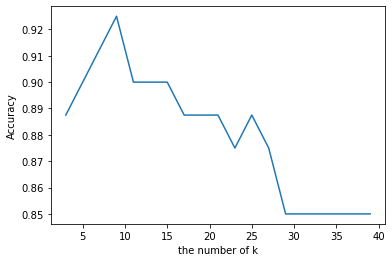

In [44]:
# k에 따른 정확도를 시각화
import matplotlib.pyplot as plt

plt.plot(k_list,cross_validation_scores)
plt.xlabel("the number of k")
plt.ylabel("Accuracy")

plt.show()

In [48]:
# 가장 예측율이 높은 k를 선정
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k is",k)

The best number of k is 9


---
### 2개의 특징으로 예측하기(3점슛, 블로킹)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=k)

In [51]:
# 학습에 사용할 features
x_train = train[['3P','BLK']]

In [52]:
# 학습에 사용할 target
y_train = train['Pos']

In [55]:
# 학습시키기
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [56]:
# 검증에 사용할 features
x_test = test[['3P','BLK']]

In [57]:
# 검증에 정답
y_test = test['Pos']

In [58]:
knn.score(x_test,y_test)

0.95

In [60]:
# 예측
pred = knn.predict(x_test)
pred

array(['SG', 'SG', 'C', 'SG', 'SG', 'SG', 'SG', 'C', 'SG', 'SG', 'SG',
       'C', 'C', 'C', 'SG', 'SG', 'SG', 'C', 'SG', 'SG'], dtype=object)

In [61]:
# 실제값과 예측값의 비교 
comparison = pd.DataFrame(
    {"예측값":pred,
    '정답' : y_test
    }
)
comparison.head()

,예측값,정답
0,SG,SG
1,SG,SG
2,C,C
3,SG,SG
4,SG,SG


# confusion matrix

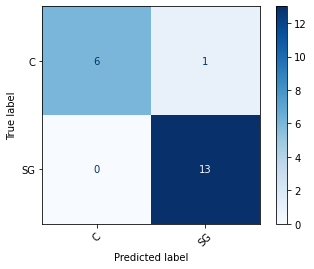

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix1 = confusion_matrix(y_test, pred)
target_names = ["C","SG"]
disp = ConfusionMatrixDisplay(
    confusion_matrix= confusion_matrix1,
    display_labels=target_names
)
disp.plot(
    cmap = plt.cm.Blues,
    xticks_rotation= 45 , # index 회전
)
plt.show()

---
### 3개의 특징으로 예측하기 ( 3점슛, 블로킹, 리바운드)

In [70]:
# 학습에 사용할 features
x_train = train[['3P','BLK','TRB']]
# 학습에 사용할 target
y_train = train['Pos']
# 학습시키기
knn.fit(x_train, y_train)
# 검증에 사용할 features
x_test = test[['3P','BLK','TRB']]
# 검증에 정답
y_test = test['Pos']

In [71]:
knn.score(x_test,y_test)

0.9

In [72]:
# 실제값과 예측값의 비교 
comparison2 = pd.DataFrame(
    {"예측값":pred,
    '정답' : y_test
    }
)
comparison2.head()

,예측값,정답
0,SG,SG
1,SG,SG
2,C,C
3,SG,SG
4,SG,SG


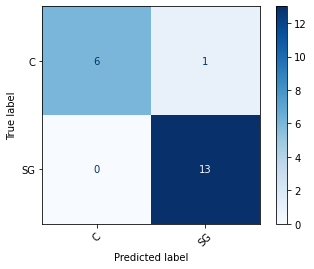

In [73]:
# 시각화
confusion_matrix1 = confusion_matrix(y_test, pred)
target_names = ["C","SG"]
disp = ConfusionMatrixDisplay(
    confusion_matrix= confusion_matrix1,
    display_labels=target_names
)
disp.plot(
    cmap = plt.cm.Blues,
    xticks_rotation= 45 , # index 회전
)
plt.show()

In [74]:
knn.predict([['3.4','0.5','37']])

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array(['C'], dtype=object)